In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix 



In [2]:
%store -r test

# Take the name of the different classes (e.g. '0', '1', '2', ...)
classes = test.groupby(['label'])['label'].unique().index.to_list()

In [3]:
predicted_test = test.copy()

feature_1= 'arctan2_2'


models = []
for n_class in classes: # Can be thrown an expection beacuse this is the labels of the test set and not of the models (train set)
    model = pickle.load(open('models_5/'+str(n_class)+'hmm_model.pkl', 'rb'))
    models.append(model)

#log_likelihoods = pd.DataFrame()
#log_likelihoods['predicted_class'] = classes
#log_like_max = []
#top_3_loglikelihood = []
top_3_predicted_classes = []
predicted_class = []
#is_predicted = []
true_label=[]

for i in range(len(test)):
    angle_1 = test[feature_1].iloc[i]
    X=np.array([angle_1]).T
    true_label.append(test['label'].iloc[i])
    list_log_likelihoods = []
    for model in models:
        
        list_log_likelihoods.append(model.score(X,lengths=len(X)))
        pass

    predicted_class.append(np.argmax(list_log_likelihoods))

    top_3_values = sorted(list_log_likelihoods)[-3:]
    top_3_predicted_classes.append([i for i, x in enumerate(list_log_likelihoods) if x == top_3_values[0] or x == top_3_values[1] or x == top_3_values[2]])
    

In [4]:
matrix=contingency_matrix(true_label, predicted_class)
print(matrix)


# print(fp,fn,tp,tn)

[[17  0  2  1  0  0 10  0  3  1]
 [ 0 13  0  0  7  1  0  1  0  1]
 [ 0  0 19  2  0  2  0  0  0  0]
 [ 0  0  2 16  0  4  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  2  0 22  0  0  1  0]
 [ 5  0  0  0  0  0 17  0  0  3]
 [ 0  0  0  0  0  3  0 17  0  1]
 [ 0  0  0  0  0  1  0  0 23  0]
 [ 0  0  0  0  1  1  0  0  0 24]]


In [5]:
accuracy=np.sum(np.diag(matrix))/np.sum(matrix)
print("Accuracy: ", accuracy)

Accuracy:  0.7782258064516129


In [6]:
# Calculate top 3 accuracy
sum_top_3 = 0
for i in range(len(top_3_predicted_classes)):
    if true_label[i] in top_3_predicted_classes[i]:
        sum_top_3 += 1

accuracy_top_3 = sum_top_3/len(predicted_test["label"])
print("Accuracy top 3: ", accuracy_top_3)

Accuracy top 3:  0.9556451612903226


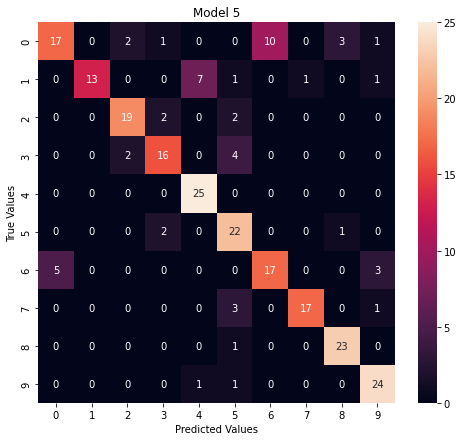

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_df = pd.DataFrame(matrix,
                     index = ['0','1','2','3','4','5','6','7','8','9'], 
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

plt.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True)
plt.title('Model 5')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [8]:
# import matplotlib.pyplot as plt
# from itertools import cycle

# from sklearn import svm, datasets
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import roc_auc_score

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# fp = matrix.sum(axis=0) - np.diag(matrix)  
# fn = matrix.sum(axis=1) - np.diag(matrix)
# tp = np.diag(matrix)
# tn = matrix.sum() - (fp + fn + tp)

# for i in range(len(classes)):
#     fpr[i] = fp / len(test)
#     tpr[i] = tp / len(test)
#     roc_auc[i] = auc(fpr[i], tpr[i])


# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(classes):
#     mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= classes


# # Plot all ROC curves
# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for i, color in zip(range(classes), colors):
#     plt.plot(
#         fpr[i],
#         tpr[i],
#         color=color,
#         lw=lw,
#         label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
#     )

# plt.plot([0, 1], [0, 1], "k--", lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Some extension of Receiver operating characteristic to multiclass")
# plt.legend(loc="lower right")
# plt.show()

In [9]:
fpr = fp / len(test)
tpr = tp / len(test)
# roc_auc = []

y = label_binarize(classes, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
i = 0
fpr, tpr, _ = roc_curve(matrix[i, :], matrix[:, i])

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

NameError: name 'fp' is not defined

In [ ]:

y

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])